# About MNIST Dataset

The MNIST database contains 60,000 training images and 10,000 testing images.
The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.
Some researchers have achieved "near-human performance" on the MNIST database, using a committee of neural networks; in the same paper, the authors achieve performance double that of humans on other recognition tasks.


https://en.wikipedia.org/wiki/MNIST_database

## Keras -- multilayer perceptron on MNIST

### importing all necessary modules

In [0]:
%matplotlib inline
from keras.utils import np_utils 
from keras.datasets import mnist               #download  mnist dataset direct from keras datasets
from keras.initializers import RandomNormal    #for weights initialize
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

### load the dataset and split the data

In [8]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [9]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


### we have to conver 28*28 into single vector 784 dimensinal vector

In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [11]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [12]:
# An example data point
print(X_train[4])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148
  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  87 232 252 253 189 210 252 252 253 168   0   

in above result each datapoint contains 784 dimensions 

0 implies white colur ant 255 implies black colour

## Normalize the data

In [0]:
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [14]:
# example data point after normlizing
print(X_train[4])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

###  convert each class label value into 10 dimensional vector

### because  MLPs  requires this conversation

In [15]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/
# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))
from keras.models import Sequential 
from keras.layers import Dense, Activation 

#### model parameters

In [0]:
# some model parameters

output_dim = 10       #uotput dimensions should be 10
input_dim = X_train.shape[1]   #input dimensions should be 784

batch_size = 128 
nb_epoch = 20           #number of epochs that we are selecting 

In [19]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

W0801 11:24:09.386624 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 11:24:09.439274 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 11:24:09.449316 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [20]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


W0801 11:24:16.575267 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 11:24:16.614786 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0801 11:24:16.767367 139714030581632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0801 11:24:16.819068 139714030581632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 1.2432 - acc: 0.7207 - val_loss: 0.7970 - val_acc: 0.8362
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.7073 - acc: 0.8439 - val_loss: 0.6005 - val_acc: 0.8638
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5826 - acc: 0.8612 - val_loss: 0.5212 - val_acc: 0.8745
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5224 - acc: 0.8703 - val_loss: 0.4768 - val_acc: 0.8809
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4857 - acc: 0.8762 - val_loss: 0.4473 - val_acc: 0.8868
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4603 - acc: 0.8806 - val_loss: 0.4265 - val_acc: 0.8903
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4415 - acc: 0.8837 - val_loss: 0.4108 - val_acc

Test score: 0.3349222825407982
Test accuracy: 0.9089


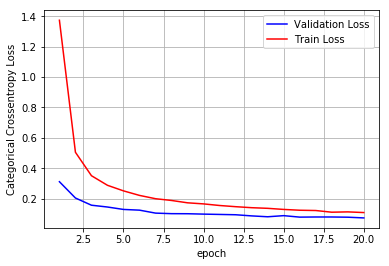

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 #  MLP + ReLU + ADAM 

## Architecture: 784----360----60-----10     (2 hidden layers)

In [0]:
# some model parameters

output_dim = 10       #uotput dimensions should be 10
input_dim = X_train.shape[1]   #input dimensions should be 784

batch_size = 128 
nb_epoch = 20           #number of epochs that we are selecting 

## Without Batch normalization and Dropout

In [28]:
# Multilayer perceptron
#from keras.layers import Dropout

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(360, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.2011 - acc: 0.9395 - val_loss: 0.1137 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0831 - acc: 0.9743 - val_loss: 0.0846 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 13s 214us/step

Test score: 0.12813367714659013
Test accuracy: 0.9805


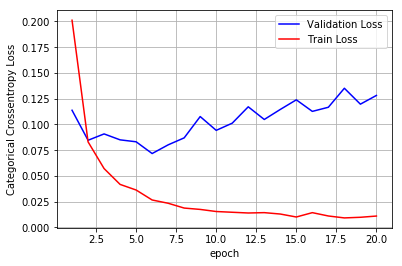

In [35]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


we can observe  from epoch numbe 5 to 20 the mode is over fitting

at 2.5 epochs train/test loss is decreased

## With Batch normalization and Dropout

In [42]:
# Multilayer perceptron
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(360, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch,batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.5729 - acc: 0.8281 - val_loss: 0.1756 - val_acc: 0.9439
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.2743 - acc: 0.9205 - val_loss: 0.1274 - val_acc: 0.9612
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - 

Test score: 0.059990370497794356
Test accuracy: 0.9826


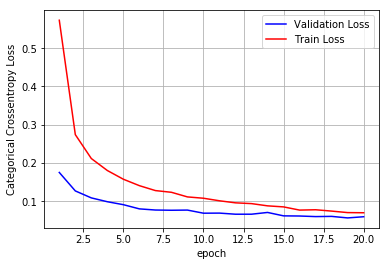

In [43]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


observation:we could observe at 5 epochs train/test loss is decreased

### Violin Plot for weights (hidden layers )

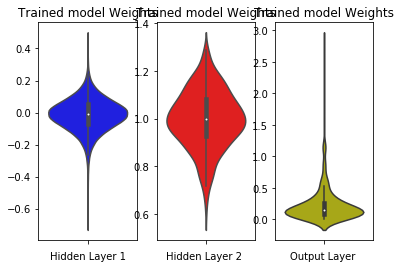

In [44]:
w_after = model_relu.get_weights()   #get all weights 

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

we can observe violin plots  with box plot for 2 hidden layers and 1 output layer


 #  MLP + ReLU + ADAM 

## Architecture: 784----400----100----40-----10     (3 hidden layers)

## Without Batch normalization and Dropout

In [46]:
# Multilayer perceptron
#from keras.layers import Dropout

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2659 - acc: 0.9212 - val_loss: 0.1293 - val_acc: 0.9609
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0960 - acc: 0.9711 - val_loss: 0.0836 - val_acc: 0.9726
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - lo

Test score: 0.09576768837510037
Test accuracy: 0.9802


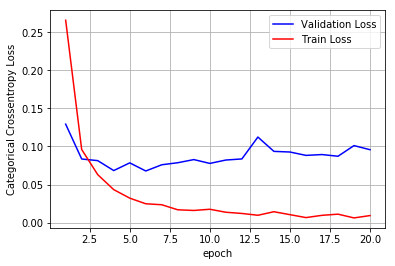

In [47]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


observation: according to the above error plot we could say model is with high overfit (without dropout and batch normalization) 

## With Batch normalization and Dropout

In [48]:
# Multilayer perceptron
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch,batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.8870 - acc: 0.7285 - val_loss: 0.2195 - val_acc: 0.9340
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.3810 - acc: 0.8930 - val_loss: 0.1589 - val_acc: 0.9511
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - 

Test score: 0.07055231085019187
Test accuracy: 0.9799


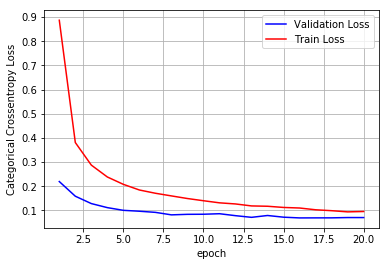

In [49]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


observation:  from 2.5 epoch to 20 epoch train/test loss is decresed 

### Violin Plot for weights (hidden layers )

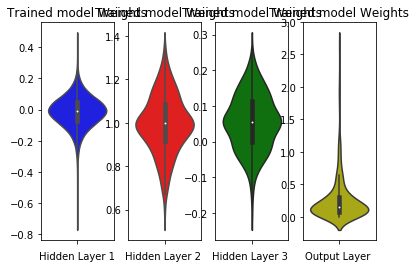

In [50]:
w_after = model_relu.get_weights()   #get all weights 

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

we can observe violin plots  with box plot for 3 hidden layers and 1 output layer


 #  MLP + ReLU + ADAM 

## Architecture: 784----400----300----210--140---60-----10     (5 hidden layers)

## Without Batch normalization and Dropout

In [52]:
# Multilayer perceptron
#from keras.layers import Dropout

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(140, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2350 - acc: 0.9294 - val_loss: 0.1442 - val_acc: 0.9573
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0948 - acc: 0.9714 - val_loss: 0.1019 - val_acc: 0.9691
Epoch 3/20
60000/60000 [==============================] - 9s 143us/step -

Test score: 0.13302001979017058
Test accuracy: 0.974


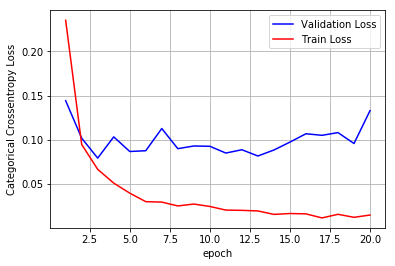

In [53]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


observation: according to the above error plot we could say model is with high overfit (without dropout and batch normalization) 

## With Batch normalization and Dropout

In [54]:
# Multilayer perceptron
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()     #model 

#initialization: we can also  use He initialization
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))  #input dimensions to layer_1 = 784
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(140, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))


model_relu.add(Dense(output_dim, activation='softmax'))     #output dimensions 10

model_sigmoid.summary()

#compile the model 

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, epochs=nb_epoch,batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_8 (Dense)              (None, 60)                21660     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                610       
Total params: 304,870
Trainable params: 304,870
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 1.3742 - acc: 0.5524 - val_loss: 0.3114 - val_acc: 0.9107
Epoch 2/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.5051 - acc: 0.8500 - val_loss: 0.2041 - val_acc: 0.9400
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step

Test score: 0.07313074707649649
Test accuracy: 0.9811


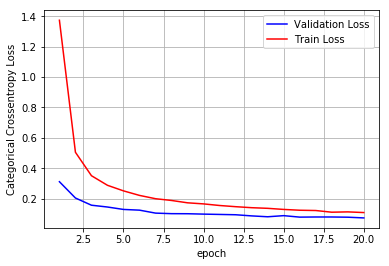

In [55]:
%matplotlib inline 
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


observation:  from 2.5 epoch to 20 epoch train/test loss is decresed 

### Violin Plot for weights (hidden layers )

<Figure size 432x288 with 0 Axes>

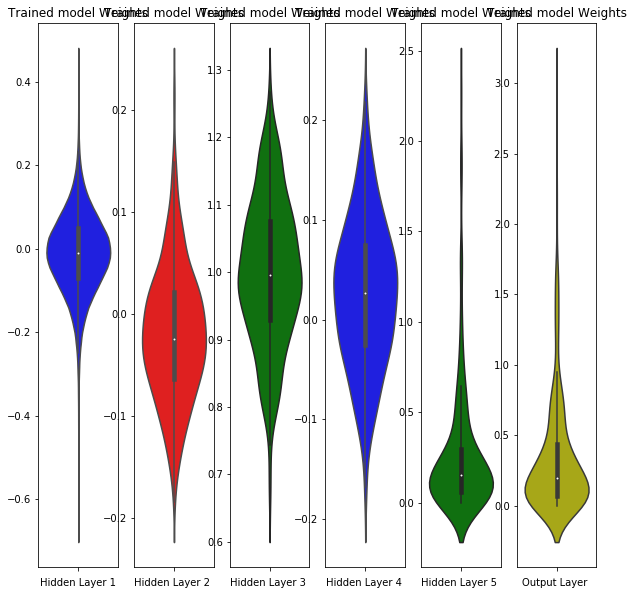

In [62]:
w_after = model_relu.get_weights()   #get all weights 

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
h4_w = w_after[3].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

we can observe violin plots  with box plot for 3 hidden layers and 1 output layer

# Summary(Conclusion):
* initially we have taken  MNIST dataset from keras, and we converted 28*28 each datapoints into 784 dimensional datapoints(then we have performed normalization on data.
*  we have converted  each class label into 10-dimensional vector.
* we did perform simple softmax classifier and then we got logloss and accuracy values
*  after that softmax classifier we have perormed  ReLU activation function  + ADAM optimization  with 
Architecture: 784----360----60-----10 (2 hidden layers), with batch normalization and dropout functions.
* after that we have applied  Architecture: 784----400----100----40-----10 (3 hidden layers) 
with batch normalization and dropout functions, then we did plot loss (vs ) each epoch plot.
* after that we have applied  Architecture: 784----400----300----210--140---60-----10 (5 hidden layers)
with batch normalization and dropout functions, then we did plot loss (vs ) each epoch plot.



# Summary in Tabular form
### all results summarized in the tabular form

In [68]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
a = PrettyTable()
a.field_names = ["model","architecture","multi-logloss","accuracy"]

a.add_row(["softmax_classifier","-",0.3542,0.9089 ])
a.add_row(["MLP+ReLu+Adam(dropout&batchnorm)","784-360-60-10(2hiddenlayers)",0.0704,0.9826])
a.add_row(["MLP+ReLu+Adam(dropout&batchnorm)","784-400-100-40-10(3hiddenlayers)",0.0957,0.9799])
a.add_row(["MLP+ReLu+Adam(dropout&batchnorm)","784-400-300-210-140-60-10(5hiddenlayers)",0.1084,0.9811])
print(a)

+----------------------------------+------------------------------------------+---------------+----------+
|              model               |               architecture               | multi-logloss | accuracy |
+----------------------------------+------------------------------------------+---------------+----------+
|        softmax_classifier        |                    -                     |     0.3542    |  0.9089  |
| MLP+ReLu+Adam(dropout&batchnorm) |       784-360-60-10(2hiddenlayers)       |     0.0704    |  0.9826  |
| MLP+ReLu+Adam(dropout&batchnorm) |     784-400-100-40-10(3hiddenlayers)     |     0.0957    |  0.9799  |
| MLP+ReLu+Adam(dropout&batchnorm) | 784-400-300-210-140-60-10(5hiddenlayers) |     0.1084    |  0.9811  |
+----------------------------------+------------------------------------------+---------------+----------+
